In [327]:
%matplotlib inline

import notebook
from notebook.nbextensions import enable_nbextension
enable_nbextension('notebook', 'usability/codefolding/main')
import numpy as np
from astropy.time import Time
from astropy.io import fits
import glob
import itertools
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns
import os
from scipy.optimize import curve_fit
import sys
from astropy import wcs 
from astropy.coordinates import SkyCoord
import astropy.units as u
sys.path.append('/Users/vs/Dropbox/Python')

bigfontsize=20
labelfontsize=16
tickfontsize=16
sns.set_context('talk')
mp.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })

In [328]:
#input_target = sys.argv[1]
#input_channel = sys.argv[2]
#catalog = sys.argv[3]

input_target = 'omegaCen_1'
input_channel = '4p5um'
#catalog = 'kaluzny2004_field1_ch1.als'
ref_image = input_target + '_e1_' + channel + '_dn.fits'

In [329]:
if (input_channel == '1' or input_channel == '3p6um'):
    channel = '3p6um'
if (input_channel =='2' or input_channel == '4p5um'):
    channel = '4p5um'
    
field = input_target[-1]
#print field, channel


In [330]:
#path = '/Volumes/Khaleesi/CRRP/Globular_Cluster_Output/omegaCen/'+ input_target +'_'+ channel + '/' + input_target + '_e*_' + channel + '_dn.fits'
#input_image_list = glob.glob(path)
input_lc_data = input_target + '_' + channel + '.cal'

#mjds = np.zeros(len(input_image_list))

## Commenting this out for now - using a list of MJDS rather than reading them from headers.

#for count in range(0, len(input_image_list)):
#    hdulist = fits.open(input_image_list[count])
#    prihdr = hdulist[0].header
#    date_obs = Time(prihdr['date_obs'])
#    mjds[count] = date_obs.mjd

## Get the mjds from these files - only applicable to omega cen data

mjd_file = input_target + '_' + channel + '.mjds'
epoch_num, mjds = np.loadtxt(mjd_file, unpack=True)

#epoch1_ids, kal_ids = np.loadtxt(input_target + '_' + channel + '_rrl.tfr', skiprows=14, usecols=(0, 15), unpack=True)
#k_xc, k_yc, periods, k_ids = np.loadtxt(catalog, usecols=(1,2,4,5), unpack=True)
with open(input_lc_data) as input:
    lines = []
    while True:
        line = list(itertools.islice(input, 3))
        if line:
            lines.append(line)
        else:
            break

num_stars = len(lines)


In [331]:
kaluzny = pd.read_csv('kaluzny_catalogues/kaluzny2004_reformatted', delim_whitespace=True, header=None, names=('ID', 'RA', 'Dec', 'Period', 'Vmag', 'Type'))

In [332]:
hdulist = fits.open(ref_image)
w = wcs.WCS(hdulist[0].header)
coords = SkyCoord(ra=kaluzny.RA, dec=kaluzny.Dec, frame='icrs', unit=(u.hour, u.deg))
kaluzny['xc'], kaluzny['yc'] = wcs.utils.skycoord_to_pixel(coords, w, 0, 'all')
image_range = hdulist[0].data.shape
hdulist.close()

image_limit_x = image_range[1]
image_limit_y = image_range[0]

In [333]:
image_range

(693, 1408)

In [334]:
kaluzny

,ID,RA,Dec,Period,Vmag,Type,xc,yc
0,V3,13:25:56.15,-47:25:53.8,0.841258,14.01,RR0,1264.445208,1440.255221
1,V4,13:26:12.93,-47:24:18.8,0.627320,13.83,RR0,953.215322,1346.587355
2,V5,13:26:18.33,-47:23:12.4,0.515274,14.00,RR0,810.141510,1357.883778
3,V7,13:27:00.90,-47:14:00.5,0.713000,14.08,RR0,-352.798882,1477.574641
4,V8,13:27:48.45,-47:28:20.3,0.521329,13.90,RR0,122.646471,-95.944105
5,V9,13:25:59.58,-47:26:24.0,0.523480,14.10,RR0,1260.201991,1363.576398
6,V10,13:26:06.99,-47:24:36.6,0.374976,14.31,RR1,1044.441339,1398.144869
7,V11,13:26:30.59,-47:23:01.6,0.564789,14.20,RR0,652.953695,1221.210917
8,V12,13:26:27.21,-47:24:06.2,0.386769,14.32,RR1,770.124520,1187.522659
9,V13,13:25:58.18,-47:25:21.6,0.669039,13.92,RR0,1202.017719,1452.968153


In [335]:
als_file = input_target + '_e1_' + channel + '_dn.cal'
als_df = pd.read_csv(als_file, delim_whitespace=True, header=None, names=('als_id', 'xc', 'yc', 'mag', 'err', 'lcorr'))

In [336]:
als_df

,als_id,xc,yc,mag,err,lcorr
0,406,99.72,286.66,13.855,0.074,1.020
1,408,100.25,85.00,15.649,0.092,1.014
2,897,157.78,89.74,14.343,0.080,1.013
3,1101,186.51,114.68,15.068,0.143,1.016
4,2018,268.80,145.30,15.167,0.120,1.022
5,4134,394.15,190.57,15.538,0.097,1.016
6,2079,271.93,219.82,15.603,0.081,1.025
7,2228,283.80,248.97,15.990,0.095,1.026
8,400,100.43,261.59,15.636,0.077,1.020
9,409,101.36,269.41,15.430,0.075,1.020


In [337]:
matched = np.ones(len(kaluzny))*-1
matched

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [338]:
curr_dir = os.getcwd().split('/')[-1]
new_dir = input_target + '_' + channel + '_plots'
is_there = os.path.exists(new_dir)
if (curr_dir != new_dir):
    if (is_there == False):
        os.mkdir(new_dir)

## Search for the matches

matched = np.ones(len(kaluzny))*-1
good_distance = np.ones(len(kaluzny))*-1

for rrl in np.arange(len(kaluzny)):
    best_distance = 100
    for test_star in np.arange(len(als_df)):
        if (kaluzny.xc[rrl] < image_limit_x and kaluzny.xc[rrl] > 0 and kaluzny.yc[rrl] < image_limit_y and kaluzny.yc[rrl] > 0):
            x_distance = kaluzny.xc[rrl] - als_df.xc[test_star]
            y_distance = kaluzny.yc[rrl] - als_df.yc[test_star]
            distance = np.sqrt(x_distance**2 + y_distance**2)
            if distance < best_distance:
                best_distance = distance
                best_match = test_star
    if best_distance < 10:
        matched[rrl] = als_df.als_id[best_match]
        good_distance[rrl] = best_distance
    best_distance = 100
        

In [339]:
matched_frame = pd.DataFrame(matched)

In [340]:
kaluzny['als_id'] = matched_frame

In [341]:
kaluzny

,ID,RA,Dec,Period,Vmag,Type,xc,yc,als_id
0,V3,13:25:56.15,-47:25:53.8,0.841258,14.01,RR0,1264.445208,1440.255221,-1.0
1,V4,13:26:12.93,-47:24:18.8,0.627320,13.83,RR0,953.215322,1346.587355,-1.0
2,V5,13:26:18.33,-47:23:12.4,0.515274,14.00,RR0,810.141510,1357.883778,-1.0
3,V7,13:27:00.90,-47:14:00.5,0.713000,14.08,RR0,-352.798882,1477.574641,-1.0
4,V8,13:27:48.45,-47:28:20.3,0.521329,13.90,RR0,122.646471,-95.944105,-1.0
5,V9,13:25:59.58,-47:26:24.0,0.523480,14.10,RR0,1260.201991,1363.576398,-1.0
6,V10,13:26:06.99,-47:24:36.6,0.374976,14.31,RR1,1044.441339,1398.144869,-1.0
7,V11,13:26:30.59,-47:23:01.6,0.564789,14.20,RR0,652.953695,1221.210917,-1.0
8,V12,13:26:27.21,-47:24:06.2,0.386769,14.32,RR1,770.124520,1187.522659,-1.0
9,V13,13:25:58.18,-47:25:21.6,0.669039,13.92,RR0,1202.017719,1452.968153,-1.0


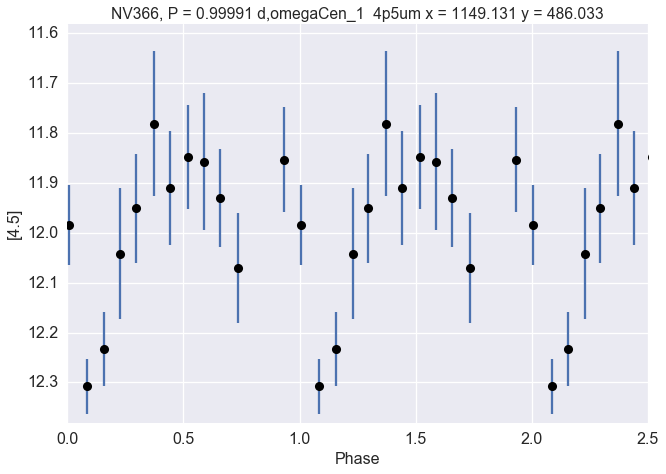

In [342]:
curr_dir = os.getcwd().split('/')[-1]
new_dir = input_target + '_' + channel + '_plots'
is_there = os.path.exists(new_dir)
if (curr_dir != new_dir):
    if (is_there == False):
        os.mkdir(new_dir)
        
for rrl in range(len(kaluzny)):
    if kaluzny.als_id[rrl] > 0:
        ep1_id = kaluzny.als_id[rrl]
        period = kaluzny.Period[rrl]
        cat_id =  kaluzny.ID[rrl]
        num_frames = 12
        objects = np.zeros((num_stars, (num_frames*2) + 3))
        for star in np.arange(0,num_stars):
            data = "".join(lines[star])
            data = data.split()
            objects[star][0] = data[0] ## ID
            objects[star][1] = data[1] ## XC
            objects[star][2] = data[2] ## YC
            for epoch in np.arange(0,(num_frames*2), 2):
                objects[star][epoch + 3]  = data[epoch + 3] ## mag
                objects[star][epoch + 4] = data[epoch + 4] ## err
            if objects[star][0] == ep1_id:
                best_star = star
                break
        mag = np.zeros(num_frames)
        err = np.zeros(num_frames)
        for epoch in np.arange(0,num_frames):
            mag[epoch] = objects[best_star][(epoch*2) + 3]  
            err[epoch] = objects[best_star][(epoch*2) + 4] 
    #print 'matched star' + str(k_a_id) + 'to ' + str(cat_id) + 'with period ' + str(period)
    idx = np.argsort(mjds)
    mjds = mjds[idx]
    mag = mag[idx]
    err = err[idx]
    phase = (mjds / period) - np.floor(mjds / period)
    phase = np.concatenate((phase,(phase+1.0),(phase+2.0),(phase+3.0),(phase+4.0)))
    
    mag_long  = np.concatenate((mag, mag, mag, mag, mag))
    
    err_long = np.concatenate((err, err, err, err, err))
    obs = np.arange(1, num_frames+1, 1)


    output = str(cat_id) + '_rrlyrae.data'
    output_file = open(new_dir + '/' + output, "w")

    for frame in np.arange(0, num_frames):
        output_file.write("{0:.8f} {1:.3f} {2:.3f} \n".format(mjds[frame], mag[frame], err[frame]))
    
    output_file.close()
    ## Sanity check plot

    mp.close()
    mp.clf()
    axp1 = mp.subplot(111)

    axp1.axis([0,2.5,(np.average(mag) + 0.4),(np.average(mag) - 0.4)])


    axp1.errorbar(phase, mag_long, yerr=err_long, ls='None')
    axp1.plot(phase, mag_long, 'ko', ls='None')
    mp.xlabel("Phase")
    if (channel == '3p6um'): mp.ylabel('[3.6]')
    if (channel == '4p5um'): mp.ylabel('[4.5]')
    mp.title(cat_id + ', P = ' + str(period) +' d,' + input_target + '  ' + channel + ' x = ' + str(objects[best_star][1]) + ' y = ' +  str(objects[best_star][2]))
    #mp.show()

    mp.savefig(new_dir + '/' + str(cat_id) + '_F' + field + '_' + channel +'.pdf')

    #mp.close()
   

In [343]:
sum(kaluzny.als_id>0)

38

In [344]:
outfile = input_target + '_' + channel + '_rrl' + '_matched_to_kaluzny.cal'
print outfile


omegaCen_1_4p5um_rrl_matched_to_kaluzny.cal


In [345]:
merged_tables = als_df.merge(kaluzny, on='als_id')
merged_tables = merged_tables.drop(['xc_y', 'yc_y'], 1)
merged_tables.rename(columns={'xc_x':'xc', 'yc_x': 'yc'}, inplace=True)

In [346]:
merged_tables

,als_id,xc,yc,mag,err,lcorr,ID,RA,Dec,Period,Vmag,Type
0,772,142.27,188.31,13.938,0.070,1.015,V82,13:27:35.61,-47:26:30.3,0.335758,14.38,RR1
1,7239,566.86,95.86,13.553,0.090,0.987,V102,13:27:22.11,-47:30:12.3,0.691396,14.01,RR0
2,2805,320.15,145.44,14.470,0.094,1.022,V19,13:27:30.14,-47:28:05.2,0.299551,14.61,RR1
3,728,137.46,547.51,14.017,0.107,0.989,V169,13:27:20.47,-47:23:59.1,0.319116,14.53,RR1
4,9540,715.02,362.50,13.212,0.098,0.985,V108,13:27:04.71,-47:29:25.7,0.594458,13.88,RR0
5,5625,475.47,264.05,14.382,0.191,1.005,NV342,13:27:18.69,-47:28:22.9,0.308389,14.49,RR1
6,13949,969.41,527.65,15.066,0.215,1.006,V271,13:26:47.13,-47:30:04.1,0.443200,14.17,RR1
7,20025,1304.39,400.04,17.381,0.331,0.955,V291,13:26:38.52,-47:33:28.0,0.334000,14.40,RR1
8,6274,509.74,339.91,13.525,0.093,0.995,V20,13:27:14.05,-47:28:06.3,0.615559,13.92,RR0
9,10342,763.60,648.18,12.245,0.158,0.971,NV347,13:26:50.88,-47:27:46.2,0.328849,14.26,RR1


In [347]:
merged_tables.to_csv(outfile, sep='\t', header=True, index=False)

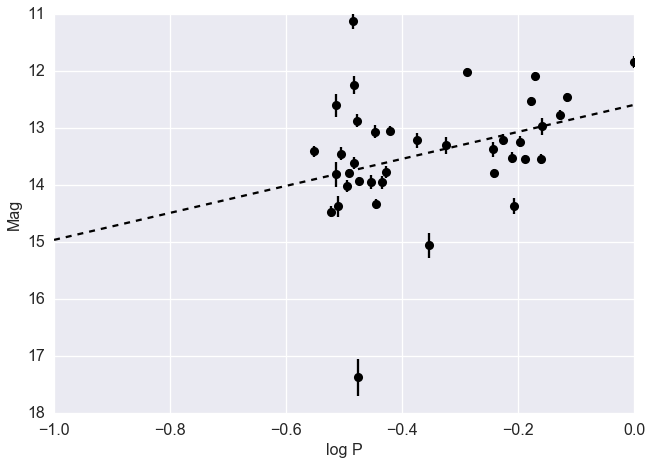

In [348]:

### Doing some quality checks on the matching
mp.close()
mp.clf()
axp1 = mp.subplot(111)

lp1 = np.arange(-1., 1, 1)
def pl1(logp, zp):
    return -2.355 * logp + zp

merged_tables['logP'] = np.log10(merged_tables.Period)
#merged_tables.logP[np.where(merged_tables['Type']=='RR1')] = np.log10(merged_tables.Period) + 0.127

#merged_tables['logP'][np.where(merged_tables['Type']=='RR1')] = merged_tables['logP'] + 0.127

popt, pcov = curve_fit(pl1,merged_tables.logP,merged_tables.mag)
zp = popt[0]
ezp = np.sqrt(float(pcov[0]))

mp.gca().invert_yaxis()
mp.xlabel('log P')
mp.ylabel('Mag')
axp1.errorbar(merged_tables.logP, merged_tables.mag, yerr=merged_tables.err, color='k', ls='none')
axp1.plot(merged_tables.logP, merged_tables.mag, 'ko')
axp1.plot(lp1, -2.370*lp1 + zp, 'k--')


In [349]:
curr_dir

'calibrated_files'